# Analiza in priprava podatkov

## 1. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import csv
import os.path

## 2. Branje podatkov

In [3]:
with open('../data/kd2019.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    head = next(reader)
    none_handler = lambda i : i or None
    main_data = np.array([none_handler(i) for i in [row for row in reader]])

## 3.1. Prikaz celotnega območja

<BarContainer object of 37 artists>

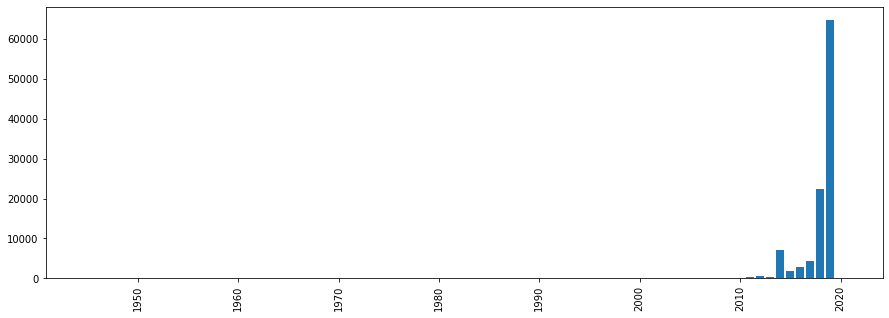

In [4]:
def get_year(row):
    return datetime.strptime(row[1], '%m.%Y').year

years = np.apply_along_axis(get_year, 1, main_data)

unique, counts = np.unique(years, return_counts=True)
year_counts = np.array(list(zip(unique, counts)))

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(year_counts[:, 0], year_counts[:, 1])

## 3.2 Prikaz glavnega območja

<BarContainer object of 37 artists>

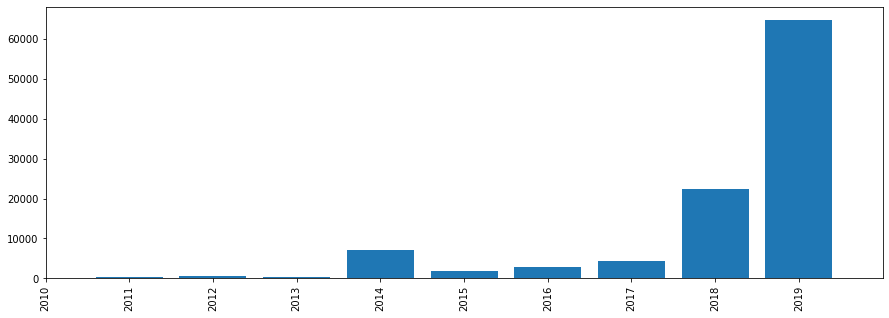

In [5]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(2010, 2020, 1),rotation=90)
plt.xlim(2010, 2020)
plt.bar(year_count[:, 0], year_count[:, 1])

Opazimo, da so nekateri zločini, zabeleženi v podatkih za leto 2019 že zelo stari vse do leta 1945. Teh zabeležb je zelo malo, ampak so vsekakor zanimive.

## 4. Pretvorba `main_data` tabele za datume

In [10]:
def get_datetime(row):
    return datetime.strptime(row[1], '%m.%Y')

main_data[:, 1] = np.apply_along_axis(get_datetime, 1, main_data)

## 5. Testiranje zelo starih

In [24]:
print(dict(zip(head, main_data[np.argsort(main_data[:, 1])][0])))
print("-" * 20)
print(dict(zip(head, main_data[np.argsort(main_data[:, 1])][1])))
print("-" * 20)
print(dict(zip(head, main_data[np.argsort(main_data[:, 1])][2])))

{'ZaporednaStevilkaKD': '057277', 'MesecStoritve': '1945-05-01 00:00:00', 'UraStoritve': '23:00-23:59', 'DanVTednu': 'ČETRTEK', 'PUStoritveKD': 'PU CELJE', 'Povratnik': 'NE', 'OpisKD': 'KZ12/102*/1/1/ - VOJNA HUDODELSTVA', 'PoglavjeKD': 'KD ZOPER ČLOVEČNOST', 'GospodarskiKriminal': 'SPLOŠNA', 'OrganiziranKriminal': ' ', 'MladoletniskaKriminaliteta': ' ', 'Poskus': 'NE', 'KriminalisticnaOznacba1': 'KRŠITVE ŽENEVSKIH KONVENCIJ - O', 'KriminalisticnaOznacba2': '', 'KriminalisticnaOznacba3': '', 'UporabljenoSredstvo1': '341-STRELNO OROŽJE', 'UporabljenoSredstvo2': '', 'UporabljenoSredstvo3': '', 'UporabljenoSredstvo4': '', 'UpravnaEnotaStoritve': 'CELJE', 'OpisKraja': 'PROSTOR DRUGIH USTANOV', 'LetoZakljucnegaDokumenta': '2019', 'VrstaZakljucnegaDokumenta': 'POROČILO', 'ZaporednaStevilkaOsebeVKD': '057277001', 'VrstaOsebe': 'OVADENI OSUMLJENEC', 'StarostniRazred': '18-24', 'Spol': 'MOŠKI', 'Drzavljanstvo': 'SLOVENSKO', 'Poskodba': '', 'VplivAlkohola': 'NE', 'VplivMamil': 'NE', 'Organiziran

To so zločini, ki so šele sedaj zaključeni, zgodili pa so se ze dolgo nazaj.

## 6. Preiskovanje substanc

### 6.1. Mamila

[['' '457']
 ['DA' '19']
 ['NE' '31876']
 ['NN' '72993']]


<BarContainer object of 4 artists>

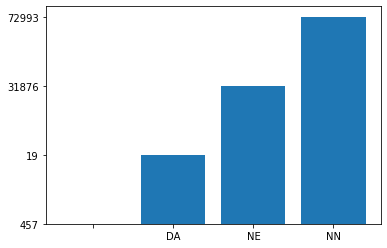

In [47]:
substance = main_data[:, -3]

unique, counts = np.unique(substance[:], return_counts=True)
mamila_counts = np.array(list(zip(unique, counts)))

print(mamila_counts)

plt.bar(mamila_counts[:, 0], mamila_counts[:, 1])

### 6.2. Alkohol

[['' '457']
 ['DA' '63']
 ['NE' '32054']
 ['NN' '72771']]


<BarContainer object of 4 artists>

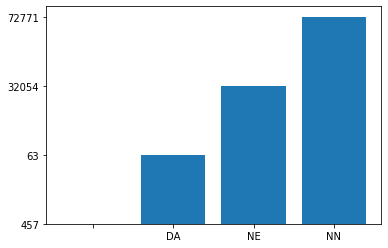

In [48]:
substance = main_data[:, -4]

unique, counts = np.unique(substance[:], return_counts=True)
alkohol_counts = np.array(list(zip(unique, counts)))

print(alkohol_counts)

plt.bar(alkohol_counts[:, 0], alkohol_counts[:, 1])

### 6.3. Skupaj

#### Dodajanje stolpca mamila
Stolpec mamila vsebuje podatek, ali ije bilo v zločinu prisotna katerakoli substanca. Torej `mamila == DA or alkohol == DA`

In [83]:
mamila = np.array([crime[-3] == 'DA' or crime[-4] == 'DA' for crime in main_data])

main_data = np.append(main_data, np.reshape(mamila, (-1, 1)), axis=1)

# np.count_nonzero(mamila) counts true's
print(f"Število zločinov, pri katerih je bila substanca zagotovo prisotna je %i." % np.count_nonzero(mamila))

Število zločinov, pri katerih je bila substanca zagotovo prisotna je 73.


In [95]:
crimes_with_substance = np.array([crime for crime in main_data if crime[-1] == "True"])

### 6.4. Write to csv file

In [99]:
if (not os.path.exists('../data/kd2019substance.csv')):
    open('../data/kd2019substance.csv', 'x')

with open('../data/kd2019substance.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(head + ["Substanca"])
    writer.writerows(crimes_with_substance)